In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [45]:
from skimage import data
from skimage.filters import sobel, gaussian
from skimage.color import rgb2gray
from skimage.exposure import equalize_adapthist, equalize_hist
from skimage.transform import rotate, rescale, resize
from skimage.morphology import binary_dilation, binary_erosion

In [53]:
soaps = plt.imread('./image-18-2-2.jpg')
bldgs = plt.imread('./image-18-2-3.jpg')
xray = plt.imread('./image-18-2-6.jpg')
aerial = plt.imread('./image-18-2-7.jpg')
kitty = plt.imread('./image-18-2-10.jpg')
dogs = plt.imread('./image-18-2-12.jpg')
R = plt.imread('./image-18-2-14.jpg')
world = plt.imread('./image-18-2-15.jpg')

# Jump into filtering

In [13]:
def show_image(image, title='Image', cmap_type='gray', ax=None):
    if ax == None:
        plt.imshow(image, cmap=cmap_type)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        ax.imshow(image, cmap=cmap_type)
        ax.set(title=title)
        ax.axis('off')

In [3]:
def plot_comparison(original, filtered, title_filtered):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6),
                                   sharex=True, sharey=True)
    
    ax1.imshow(original, cmap='gray')
    ax1.set(title='Original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap='gray')
    ax2.set(title=title_filtered)
    ax2.axis('off')

## Edge detection

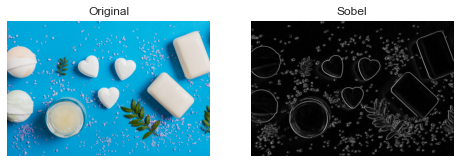

In [7]:
soaps_gray = rgb2gray(soaps)

# apply sobel edge detection
edge_sobel = sobel(soaps_gray)

plot_comparison(soaps, edge_sobel, 'Sobel')

## Blurring to reduce noise

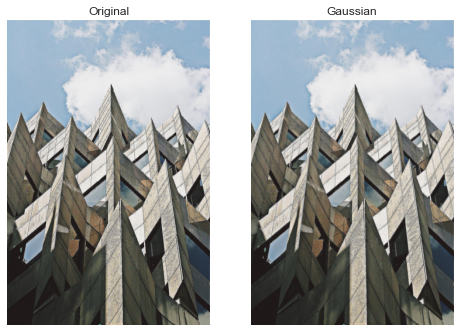

In [9]:
# apply gaussian filter to bldgs
bldgs_gaussian = gaussian(bldgs, multichannel=True)

plot_comparison(bldgs, bldgs_gaussian, 'Gaussian')

# Contrast enhancement

## Medical images

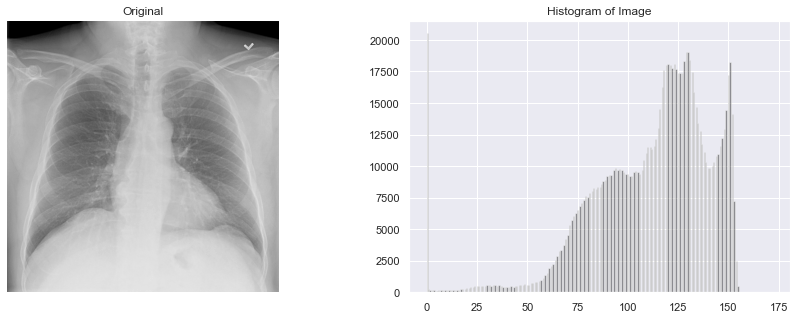

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

show_image(xray,
           'Original',
           ax=ax1)

sns.distplot(xray.ravel(),
             kde=False,
             bins=256,
             color='black',
             ax=ax2)
ax2.set(title='Histogram of Image')

plt.show()

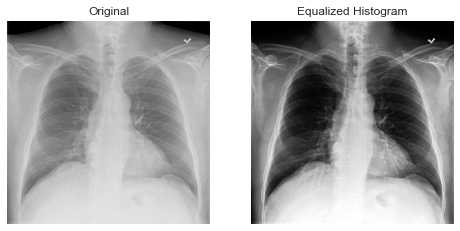

In [21]:
# use histogram equalization to improve contrast
xray_eq = equalize_hist(xray)

plot_comparison(xray, xray_eq, 'Equalized Histogram')

## Aerial image

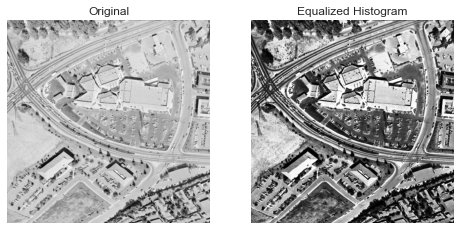

In [24]:
# use histogram equalization to improve contrast
aerial_eq = equalize_hist(aerial)

plot_comparison(aerial, aerial_eq, 'Equalized Histogram')

## Let's add some impact and contrast

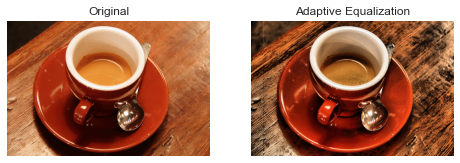

In [26]:
coffee = data.coffee()

# apply adaptive equalization

coffee_aeq = equalize_adapthist(coffee, clip_limit=0.03)

plot_comparison(coffee, coffee_aeq, 'Adaptive Equalization')

# Transformations

## Aliasing, rotating and rescaling

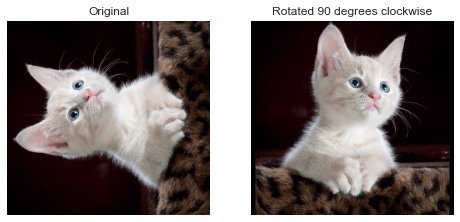

In [31]:
plot_comparison(kitty, rotate(kitty, -90), 'Rotated 90 degrees clockwise')

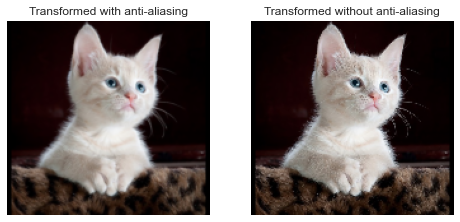

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

show_image(rescale(rotate(kitty, -90), 1/4,anti_aliasing=True, multichannel=True),
           'Transformed with anti-aliasing',
           ax=ax1)

show_image(rescale(rotate(kitty, -90), 1/4,anti_aliasing=False, multichannel=True),
           'Transformed without anti-aliasing',
           ax=ax2)

plt.show()

Seems like the anti aliasing filter prevents the poor pixelation effect to happen, making it look better but also less sharp.

## Enlarging images

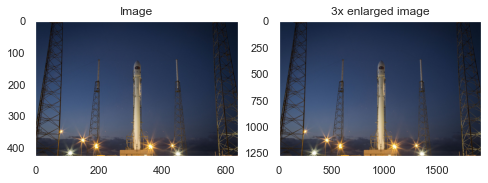

In [40]:
rocket = data.rocket()

rocket_x3 = rescale(rocket, 3,
                    anti_aliasing=True,
                    multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

show_image(rocket,
           ax=ax1)

show_image(rocket_x3,
           '3x enlarged image',
           ax=ax2)
ax1.axis('on')
ax1.grid(False)
ax2.axis('on')
ax2.grid(False)

plt.show()

## Proportionally resizing

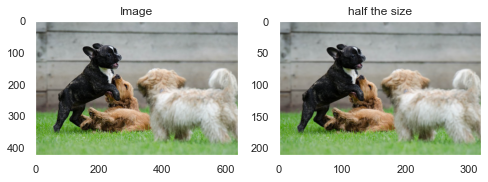

In [43]:
# set proportional heights so it's half its size
height = int(dogs.shape[0] / 2)
width = int(dogs.shape[1] / 2)

# resize
dogs_resized = resize(dogs, 
                      (height, width), 
                      anti_aliasing=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

show_image(dogs,
           ax=ax1)

show_image(dogs_resized,
           'half the size',
           ax=ax2)
ax1.axis('on')
ax1.grid(False)
ax2.axis('on')
ax2.grid(False)

plt.show()

# Morphology

## Handwritten letters

In [48]:
R = rgb2gray(R)

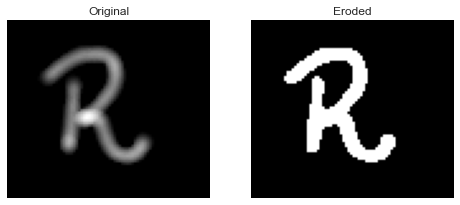

In [52]:
R_eroded = binary_erosion(R)

plot_comparison(R, R_eroded, 'Eroded')

## Improving the thresholded image

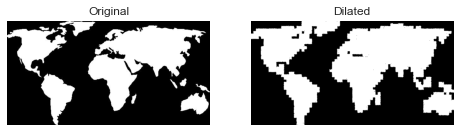

In [57]:
world_dilated = binary_dilation(world)

plot_comparison(world, world_dilated, 'Dilated')